# The XOR problem

The XOR problem is notoriously not linearly separable, therefore we will need a non-linear funciont to be able to classify it.

We will use a very similar dataset to the perceptron problem, the only difference is that undernhit we will have a XOR-like distribution.

Please complete the code in the where you find the "# complete here" commnet.

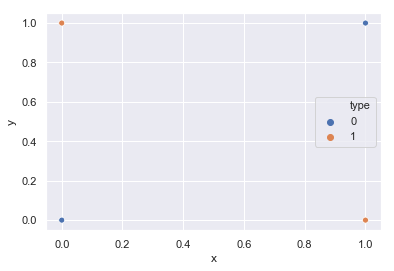

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import roc_auc_score, mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

# initiating random number
np.random.seed(11)

# from sklearn.metrics import confusion_matrix

data_xor = pd.DataFrame({'x': [0, 1, 0, 1], 'y':[0, 0, 1, 1], 'type': ['0', '1', '1', '0']})

ax = sns.scatterplot(x="x", y="y", hue="type",
                      data=data_xor)


In [12]:
data_xor.pivot(index='x', columns='y')

type   
y    0  1
x        
0    0  1
1    1  0

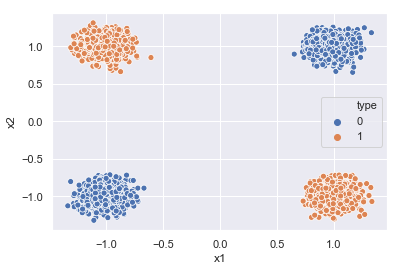

In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import matplotlib

matplotlib.use("TkAgg")

# initiating random number
np.random.seed(11)

#### Creating the dataset

# mean and standard deviation for the x belonging to the first class
mu_x1, sigma_x1 = 0, 0.1

# constat to make the second distribution different from the first
x1_mu_diff, x2_mu_diff, x3_mu_diff, x4_mu_diff = 0, 1, 0, 1

# creating the first distribution
d1 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000) + 1,
                   'x2': np.random.normal(mu_x1, sigma_x1, 1000) + 1,
                   'type': 0})

d2 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000) + 1,
                   'x2': np.random.normal(mu_x1, sigma_x1, 1000) - 1,
                   'type': 1})

d3 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000) - 1,
                   'x2': np.random.normal(mu_x1, sigma_x1, 1000) - 1,
                   'type': 0})

d4 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000) - 1,
                   'x2': np.random.normal(mu_x1, sigma_x1, 1000) + 1,
                   'type': 1})

data = pd.concat([d1, d2, d3, d4], ignore_index=True)

ax = sns.scatterplot(x="x1", y="x2", hue="type",
                      data=data)



In [14]:
# Splitting the dataset in training and test set
msk = np.random.rand(len(data)) < 0.8

# Roughly 80% of data will go in the training set
train_x, train_y = data[['x1', 'x2']][msk], data[['type']][msk].values

# Everything else will go into the validation set
test_x, test_y = data[['x1', 'x2']][~msk], data[['type']][~msk].values

In [15]:
def sigmoid(s):
    # Activation function
    return 1 / (1 + np.exp(-s))


def sigmoid_prime(s):
    # Derivative of the sigmoid
    return sigmoid(s) * (1 - sigmoid(s))


class FFNN(object):

    def __init__(self, input_size=2, hidden_size=2, output_size=1):
        # Adding 1 as it will be our bias
        self.input_size = input_size + 1
        self.hidden_size = hidden_size + 1
        self.output_size = output_size

        self.o_error = 0
        self.o_delta = 0
        self.z1 = 0
        self.z2 = 0
        self.z3 = 0
        self.z2_error = 0

        # The whole weight matrix, from the inputs till the hidden layer
        self.w1 = np.random.randn(self.input_size, self.hidden_size)
        # The final set of weights from the hidden layer till the output layer
        self.w2 = np.random.randn(self.hidden_size, self.output_size)

    def forward(self, X):
        # Forward propagation through our network
        X['bias'] = 1  # Adding 1 to the inputs to include the bias in the weight
        self.z1 = np.dot(X, self.w1)  # dot product of X (input) and first set of 3x2 weights
        self.z2 = sigmoid(self.z1)  # activation function
        self.z3 = np.dot(self.z2, self.w2)  # dot product of hidden layer (z2) and second set of 3x1 weights
        o = sigmoid(self.z3)  # final activation function
        return o

    def backward(self, X, y, output, step):
        # Backward propagation of the errors
        X['bias'] = 1  # Adding 1 to the inputs to include the bias in the weight
        self.o_error = y - output  # error in output
        self.o_delta = self.o_error * sigmoid_prime(output) * step  # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(
            self.w2.T)  # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error * sigmoid_prime(self.z2) * step  # applying derivative of sigmoid to z2 error

        self.w1 += X.T.dot(self.z2_delta)  # adjusting first of weights
        self.w2 += self.z2.T.dot(self.o_delta)  # adjusting second set of weights

    def predict(self, X):
        return forward(self, X)

    def fit(self, X, y, epochs=10, step=0.05):
        for epoch in range(epochs):
            X['bias'] = 1  # Adding 1 to the inputs to include the bias in the weight
            output = self.forward(X)
            self.backward(X, y, output, step)


In [16]:

my_network = FFNN()

my_network.fit(train_x, train_y, epochs=10000, step=0.001)

pred_y = test_x.apply(my_network.forward, axis=1)

test_y_ = [i[0] for i in test_y]
pred_y_ = [i[0] for i in pred_y]

print('MSE: ', mean_squared_error(test_y_, pred_y_))
print('AUC: ', roc_auc_score(test_y_, pred_y_))

threshold = 0.5
pred_y_binary = [0 if i > threshold else 1 for i in pred_y_]

cm = confusion_matrix(test_y_, pred_y_binary, labels=[0, 1])

print(pd.DataFrame(cm,
                   index=['True 0', 'True 1'],
                   columns=['Predicted 0', 'Predicted 1']))


MSE:  0.1441105052948543
AUC:  1.0
        Predicted 0  Predicted 1
True 0            3          422
True 1          392            0


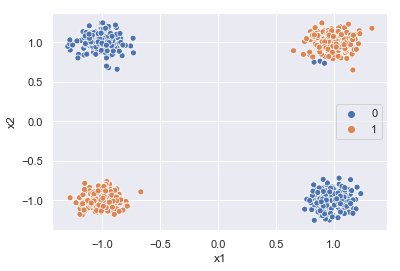

In [17]:

# data['predicted'] = [0 if i > threshold else 1 for i in pred_y]

ax = sns.scatterplot(x="x1", y="x2", hue=pred_y_binary,
                      data=data[~msk])
